# Analyze e-store data to improve sales strategy
-
### In this project, I analyzed data from an e-store to better understand its sales performance. I explored the data to see when sales were highest, which products were ordered the most, and what time should we display ads to increase the likelihood of customers purchasing products. This analysis helps in planning better sales strategies for the store. This is my first data analysis project, and I am practicing using pandas, matplotlib, and seaborn to build my skills in data exploration and visualization.

### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bringing the whole data
df1 = pd.read_csv('Sales/Sales_January_2019.csv')
df1['month'] = 'jan'
df2 = pd.read_csv('Sales/Sales_February_2019.csv')
df2['month'] = 'feb'
df3 = pd.read_csv('Sales/Sales_March_2019.csv')
df3['month'] = 'mar'
df4 = pd.read_csv('Sales/Sales_April_2019.csv')
df4['month'] = 'apr'
df5 = pd.read_csv('Sales/Sales_May_2019.csv')
df5['month'] = 'may'
df6 = pd.read_csv('Sales/Sales_June_2019.csv')
df6['month'] = 'june'
df7 = pd.read_csv('Sales/Sales_July_2019.csv')
df7['month'] = 'july'
df8 = pd.read_csv('Sales/Sales_August_2019.csv')
df8['month'] = 'aug'
df9 = pd.read_csv('Sales/Sales_September_2019.csv')
df9['month'] = 'sep'
df10 = pd.read_csv('Sales/Sales_October_2019.csv')
df10['month'] = 'oct'
df11 = pd.read_csv('Sales/Sales_November_2019.csv')
df11['month'] = 'nov'
df12 = pd.read_csv('Sales/Sales_December_2019.csv')
df12['month'] = 'dec'


In [3]:
# the shape of all datasets
list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
for i in list:
    print(i.shape)
   

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [4]:
#merging the datasets
frame = pd.concat(list , ignore_index=True)
frame 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


### data discovery

In [5]:
# some information about the data
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [6]:
# we will see if the data contains null values
frame.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [7]:
# number of duplicated values
frame.duplicated().sum()

np.int64(1140)

In [8]:
# the unique values of each column
frame.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
month                   12
dtype: int64

In [9]:
# the unique products at the store
frame['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

### data cleaning

In [10]:
# putting all the column names in lowercase letters
frame.columns = [col.lower() for col in frame]
frame.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

In [11]:
# removing the spaces between the names of columns
frame.rename(columns={
    'order id' : 'order_id',
    'quantity ordered' : 'quantity_ordered',
    'price each' : 'price_each',
    'order date' : 'order_date',
    'purchase address' : 'purchase_address'
},inplace=True
            )
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


In [12]:
# the percentage of null values
(frame.isnull().sum().sum()) / frame.size * 100

np.float64(0.25000955694025)

In [13]:
# Dropping the null tuples 
frame = frame.dropna()
frame.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
dtype: int64

In [14]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [15]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [16]:
# as we saw  we will remove some srting values in the columns that we want to change thir type
df = frame[(frame['quantity_ordered'] != "Quantity Ordered") & (frame['price_each'] != "Price Each")]

In [17]:
df['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [18]:
df['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [19]:
# changing the type of two columns
df = df.astype({'quantity_ordered':int , 'price_each':float})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int64  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


### analyzing and visualizing the data

**1) we will see Which month had the highest sales, and what was the total amount**


In [21]:
df['sales'] = df['quantity_ordered']*df['price_each']
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99


In [22]:
month_sales = df.groupby('month')['sales'].agg(sales_sum = 'sum').sort_values(by='sales_sum',ascending=False).reset_index()
month_sales

,month,sales_sum
0,dec,4619297.12
1,oct,3736884.05
2,apr,3396059.11
3,nov,3198909.23
4,may,3144584.80
5,mar,2809063.30
6,july,2646899.69
7,june,2578293.30
8,aug,2244412.31
9,feb,2203481.24


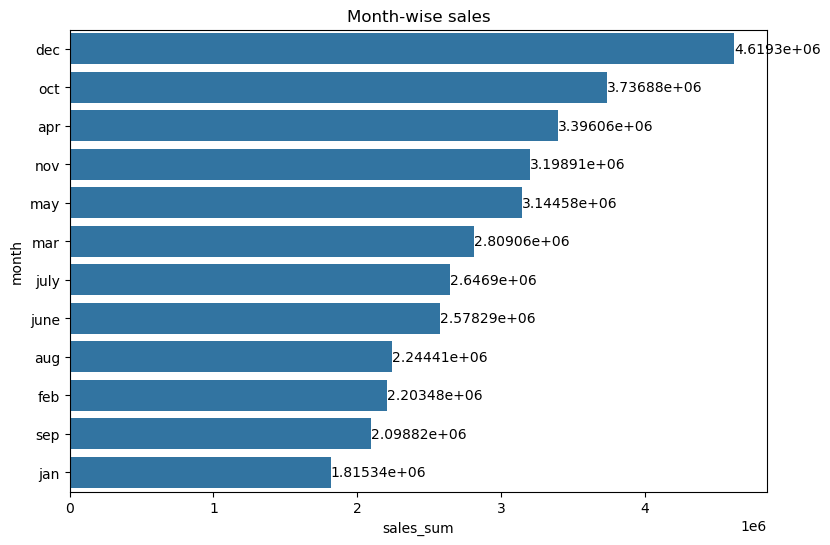

In [23]:
fig , ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x='sales_sum' , y='month' , data=month_sales)
plt.title('Month-wise sales')
ax.bar_label(ax.containers[0])
plt.show()

**2) we will se wich city has the most sales**

In [24]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['purchase_address'].apply(lambda x : get_city(x) +'(' + get_state(x) +')')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston(MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland(OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco(CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles(CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin(TX)


In [25]:
city_sales = df.groupby('city')['sales'].agg(city_sales = 'sum').sort_values(by='city_sales',ascending=False).reset_index()
city_sales

,city,city_sales
0,San Francisco(CA),8262203.91
1,Los Angeles(CA),5452570.80
2,New York City(NY),4664317.43
3,Boston(MA),3661642.01
4,Atlanta(GA),2795498.58
5,Dallas(TX),2767975.40
6,Seattle(WA),2747755.48
7,Portland(OR),1870732.34
8,Austin(TX),1819581.75
9,Portland(ME),449758.27


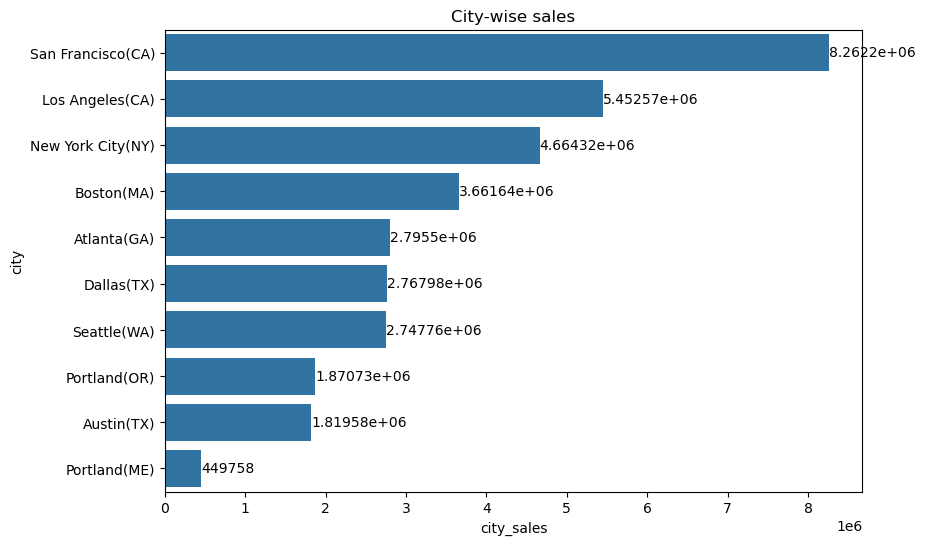

In [26]:
fig , ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x='city_sales' , y='city' , data=city_sales)
plt.title('City-wise sales')
ax.bar_label(ax.containers[0])
plt.show()

**3) we will see which product that sold the most**

In [27]:
df['product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [28]:
product_sales =  df.groupby('product')['quantity_ordered'].agg(quantity_ordered = 'sum').sort_values(by='quantity_ordered',ascending=False).reset_index()
product_sales

,product,quantity_ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


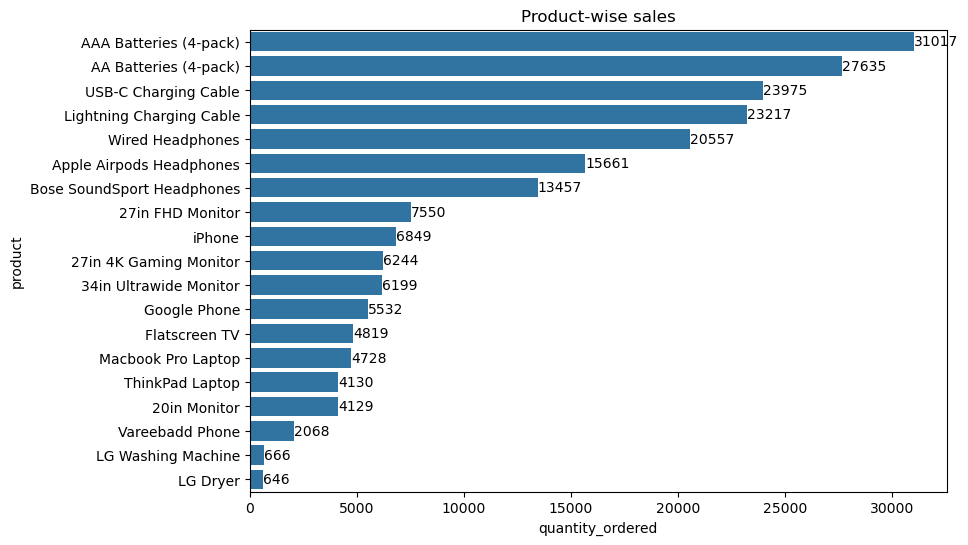

In [29]:
fig , ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x='quantity_ordered' , y='product' , data=product_sales)
plt.title('Product-wise sales')
ax.bar_label(ax.containers[0])
plt.show()

**4) we will see what time should we display ads to increase the likelihood of customers purchasing products**

In [30]:
time_sales = df
list_time = []
for i in time_sales['order_date'] :
    list_time.append(i.split(' ')[1])

time_sales['time'] = list_time
time_sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston(MA),21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland(OR),14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco(CA),13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles(CA),20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin(TX),11:59
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95,San Francisco(CA),20:58
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68,Los Angeles(CA),12:01
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00,Seattle(WA),06:43
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99,Dallas(TX),10:39


In [31]:
time_sales =  df.groupby('time')['sales'].agg(time_sales = 'sum').sort_values(by='time_sales',ascending=False).reset_index()
time_sales.head()

,time,time_sales
0,19:01,54503.14
1,12:21,54181.96
2,19:16,54156.39
3,20:13,53149.51
4,19:20,52903.41


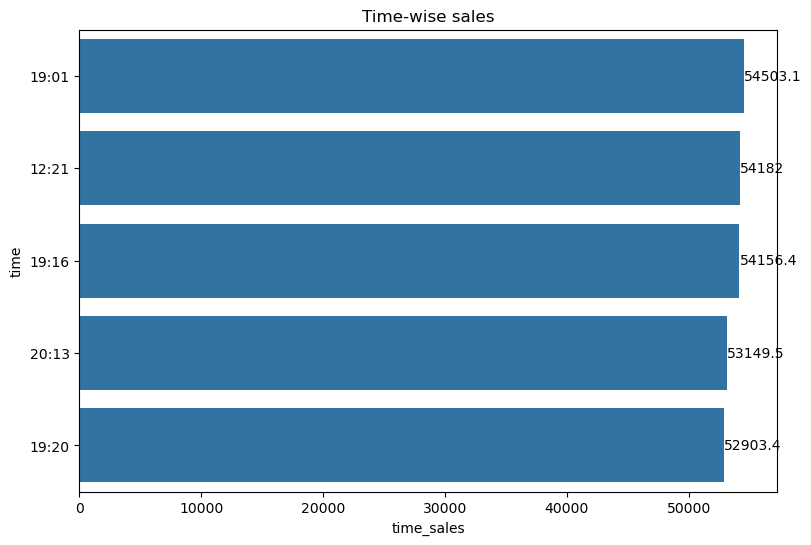

In [32]:
fig , ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x='time_sales' , y='time' , data=time_sales.head())
plt.title('Time-wise sales')
ax.bar_label(ax.containers[0])
plt.show()

**5) how many ptoducts that sold in all times**

In [33]:
top_sales = time_sales

total_quantity_sold = df[df['time'].isin(top_sales['time'])]\
    .groupby('time')['quantity_ordered']\
    .agg(total_quantity_sold='sum')\
    .sort_values(by='total_quantity_sold', ascending=False)\
    .reset_index()

total_quantity_sold.head()

,time,total_quantity_sold
0,11:58,282
1,19:20,281
2,19:36,275
3,19:17,272
4,13:25,271


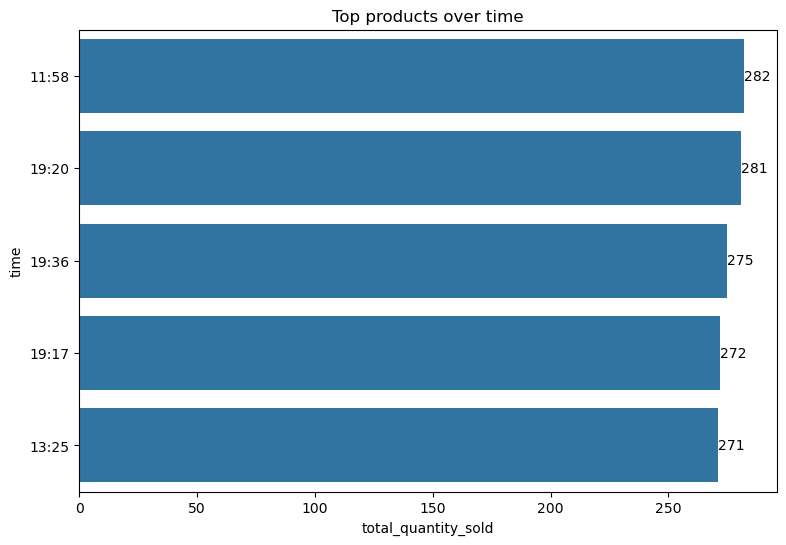

In [34]:
fig , ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x='total_quantity_sold' , y='time' , data=total_quantity_sold.head())
plt.title('Top products over time')
ax.bar_label(ax.containers[0])
plt.show()